# Regresión lineal en Python

## El paquete Scikit-learn para regresión lineal y la selección de rasgos

In [3]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from IPython.display import Image

In [6]:
data = pd.read_csv("C:/Users/Megaport/Desktop/python/datos machine learning/ads/Advertising.csv")

In [7]:
a = np.random.randn(len(data))

(array([ 3.,  3., 11., 24., 33., 46., 39., 20., 17.,  4.]),
 array([-3.07720377, -2.52701077, -1.97681778, -1.42662478, -0.87643178,
        -0.32623878,  0.22395422,  0.77414722,  1.32434022,  1.87453321,
         2.42472621]),
 <a list of 10 Patch objects>)

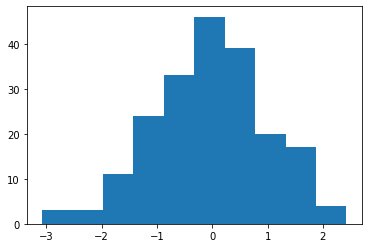

In [8]:
plt.hist(a)

In [9]:
check = (a<0.8)
training = data[check]
testing = data[~check]

In [10]:
len(training), len(testing)

(159, 41)

In [11]:
import statsmodels.formula.api as smf
lm = smf.ols(formula="Sales~TV+Radio", data = training).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     685.3
Date:                Sat, 09 Nov 2019   Prob (F-statistic):           5.43e-78
Time:                        20:26:03   Log-Likelihood:                -312.42
No. Observations:                 159   AIC:                             630.8
Df Residuals:                     156   BIC:                             640.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9000      0.333      8.712      0.000       2.242       3.558
TV             0.0466      0.002     29.739      0.000       0.044       0.050
Radio          0.1835      0.009     19.671      0.000       0.165       0.202
==============================================================================
Omnibus:                       47.939   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.315
Skew:                          -1.304   Prob(JB):                     3.02e-24
Kurtosis:                       6.089   Cond. No.                         412.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sales = 3.0905 + 0.0443 TV	+ 0.1902 Radio

## Validación del modelo con el conjunto de testing

In [12]:
sales_pred = lm.predict(testing)
sales_pred

1      12.186584
3      17.540162
4      13.307942
10      7.044929
18      9.887299
21     14.899544
24      8.115846
31     11.354904
35     17.199951
54     20.428277
56      8.397410
58     21.827022
64     16.864757
68     19.010632
70     17.794684
71     10.641489
77     13.746277
88     11.695069
89     16.789768
98     24.164221
113    16.448708
123    14.986982
124    19.523416
127     6.637552
135    13.776861
141    18.423975
145     9.787099
146    15.429140
152    16.385005
153    18.169251
160    14.260911
162    15.001899
163    17.273509
167    13.491847
170     7.359099
180    10.675198
181    14.073808
189     5.992192
194    16.410151
197    12.855555
199    15.294906
dtype: float64

In [13]:
SSD = sum((testing["Sales"]-sales_pred)**2)
SSD

84.90054325668936

In [14]:
RSE = np.sqrt(SSD/(len(testing)-2-1))
RSE

1.4947323581646503

In [15]:
sales_mean = np.mean(testing["Sales"])
error = RSE/sales_mean
error

0.10472321716464571